\begin{center}
Gabe Morris
\end{center}

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
from IPython.display import display

plt.style.use('maroon_ipynb.mplstyle')

\pagebreak
\tableofcontents
\pagebreak

\begin{center}
\begin{tabular}{c c c}
ME 8253 & Homework 5 & Gabe Morris \\
& & gnm54
\end{tabular}
\end{center}

# Preliminary Questions

**What are the expressions of the plastic zone size for plane stress and plane strain?**

For plane stress:

$$2r_y=\frac{1}{\pi}\left(\frac{K}{S_y}\right)^2$$

For plane strain:

$$2r_y=\frac{1}{3\pi}\left(\frac{K}{S_y}\right)^2$$

where $K$ is the stress intensity factor, $r_y$ is the plastic zone radius, and $S_y$ is the yield strength.

**What are the restrictions on the use of LEFM?**

The following restrictions on the use of the LEFM are: 

* The plastic zone size at the crack tip must be small relative to the crack length.
* The net nominal stresses in the crack plane must be less than $0.8S_y$
* Under monotonic loading, $r_y\le(1/8)a$
* $r_y\le(1/8)t$ and $r_y\le(1/8)(w-a)$
* For cyclic loading, $r_y\le a/4$

**What are the restrictions for the plane strain fracture toughness $K_{IC}$ value to be considered valid?**

In order for a plane strain fracture toughness value to be considered valid, it is required that:

$$a\ge2.5\left(\frac{K_{IC}}{S_y}\right)^2$$
$$t\ge2.5\left(\frac{K_{IC}}{S_y}\right)^2$$

\pagebreak

\begin{center}
\begin{tabular}{ccc}
ME 8253 & Homework 5 & Gabe Morris \\
& & gnm54
\end{tabular}
\end{center}

#
## Given
A gas turbine component is made of recrystallized, annealed Ti-6A1-4V with $K_{IC}=85\ MPa\sqrt{m}$ and $S_y=815\ MPa$. A surface semi-circular crack ($a/c=1$) (shown in the figure below) is found during a routine maintenance inspection. If the component thickness is 25 mm, comment on the stress state (plane stress or plane strain).

\begin{center}
\includegraphics{images/fig1}
\end{center}

\begin{center}
\includegraphics{images/fig2}
\end{center}

\begin{center}
\includegraphics{images/fig3}
\end{center}

## Find
a. If a stress is applied normal to the crack plane like that in the second figure, what maximum stress is required to cause fracture if $a=8\ mm$ and $K_c=105\ MPa\sqrt{m}$?
b. If the thickness were doubled, what maximum stress would cause fracture?
c. Comment on the conditions required for fracture at each thickness and whether LEFM is valid for each case.

## Solution
The plane stress or plane strain condition can be deduced from the following relationships:

$$a\ge2.5\left(\frac{K_{IC}}{S_y}\right)^2$$
$$t\ge2.5\left(\frac{K_{IC}}{S_y}\right)^2$$

where if true, the condition is plane strain. If not true, then the condition is either a mixed mode or a plane stress condition.

In [2]:
K_IC = 85  # MPa sqrt(m)
S_y = 815  # MPa
a = 8  # mm
t = 25  # mm

# Apply conditions
expr = 2.5*(K_IC/S_y)**2
a >= expr*1000, t >= expr*1000

(False, False)

Therefore, the condition can be considered to be **plane stress**.

### Part A
The relationship for a semi-elliptical surface crack is

$$K=\frac{1.12 S \sqrt{\pi a}}{\Phi} \sqrt{\sec (\pi a / 2 t)}$$

In [3]:
K_c = 105
S_t = lambda t_: K_c*1.571/(1.12*np.sqrt(np.pi*a/1000))*np.sqrt(np.cos(np.pi*a/(2*t_)))
S_t(25)  # MPa

869.6722102981946

### Part B

In [4]:
S_t(50)  # MPa

914.3153034270322

### Part C
The LEFM method can be tested by finding the plastic zone size.

In [5]:
# For plane stress
r_y = 1/(2*np.pi)*(K_c/S_y)**2*1000
r_y  # mm

2.6417000979911123

In [6]:
# Monotonic test
r_y <= (1/8)*a

False

In [7]:
r_y <= (1/8)*t

True

In [8]:
# For cyclic loading
r_y <= a/4

False

**The LEFM method is not a good approximation.** This is because the plastic zone size ($r_y$) is not significantly less than the crack length ($a$), and the calculated stress values exceed the yield strength of $815\ MPa$.

\pagebreak

\begin{center}
\begin{tabular}{ccc}
ME 8253 & Homework 5 & Gabe Morris \\
& & gnm54
\end{tabular}
\end{center}

#
## Given
A uni axially loaded very wide sheet of medium-strength steel is subjected to constant amplitude loading at $R=0$ with $S_{max}=110\ MPa$. Let $K_c=95\ MPa\sqrt{m}$ and $S_y=440\ MPa$. The material displays the following region II Paris relationship for long crack behavior at $R=0$:

$$\frac{da}{dN}=2.4\times10^{-11}(\Delta K)^{2.75}$$

where $da/dN$ is in $m/cycle$ and $\Delta K$ is in $MPa\sqrt{m}$. Data on physically small cracks were generated for the same material at $R=0$, and fitting a power law expression to the data yielded the following relationship:

$$\frac{da}{dN}=1.8\times10^{-10}(\Delta K)^{1.75}$$

## Find
a. Plot the equation for these two relationships. Plot the long crack equation between $10^{-8}\ m/cycle<\frac{da}{dN}<10^{-5}\ m/cycle$ and the small crack equation between $1\ MPa\sqrt{m}$ and where it begins to merge with the long crack Paris equation. If $\Delta K_{th}=5\ MPa\sqrt{m}$ for the long crack data, also sketch the approximate sigmoidal portion of the long crack growth curve in region I. Complete the approximate sigmoidal long crack grown curve with $K_c$
b. Based on your plot, will extrapolation of the paris equation to region I predict conservative or non-conservative fatigue life if a physically small crack exists in a component made from this material?

Laboratory experiments have shown that for this material, physically small crack growth occurs up to a length of 1 mm. If the wide sheet contains an initial edge crack with $a_i=0.3\ mm$:

c. Calculate the fatigue life of the sheet using only the long crack.
d. Calculate the fatigue life, taking into consideration the small crack and the long crack.
e. Comment on your results and the use of this life prediction technique.

## Solution
### Part A

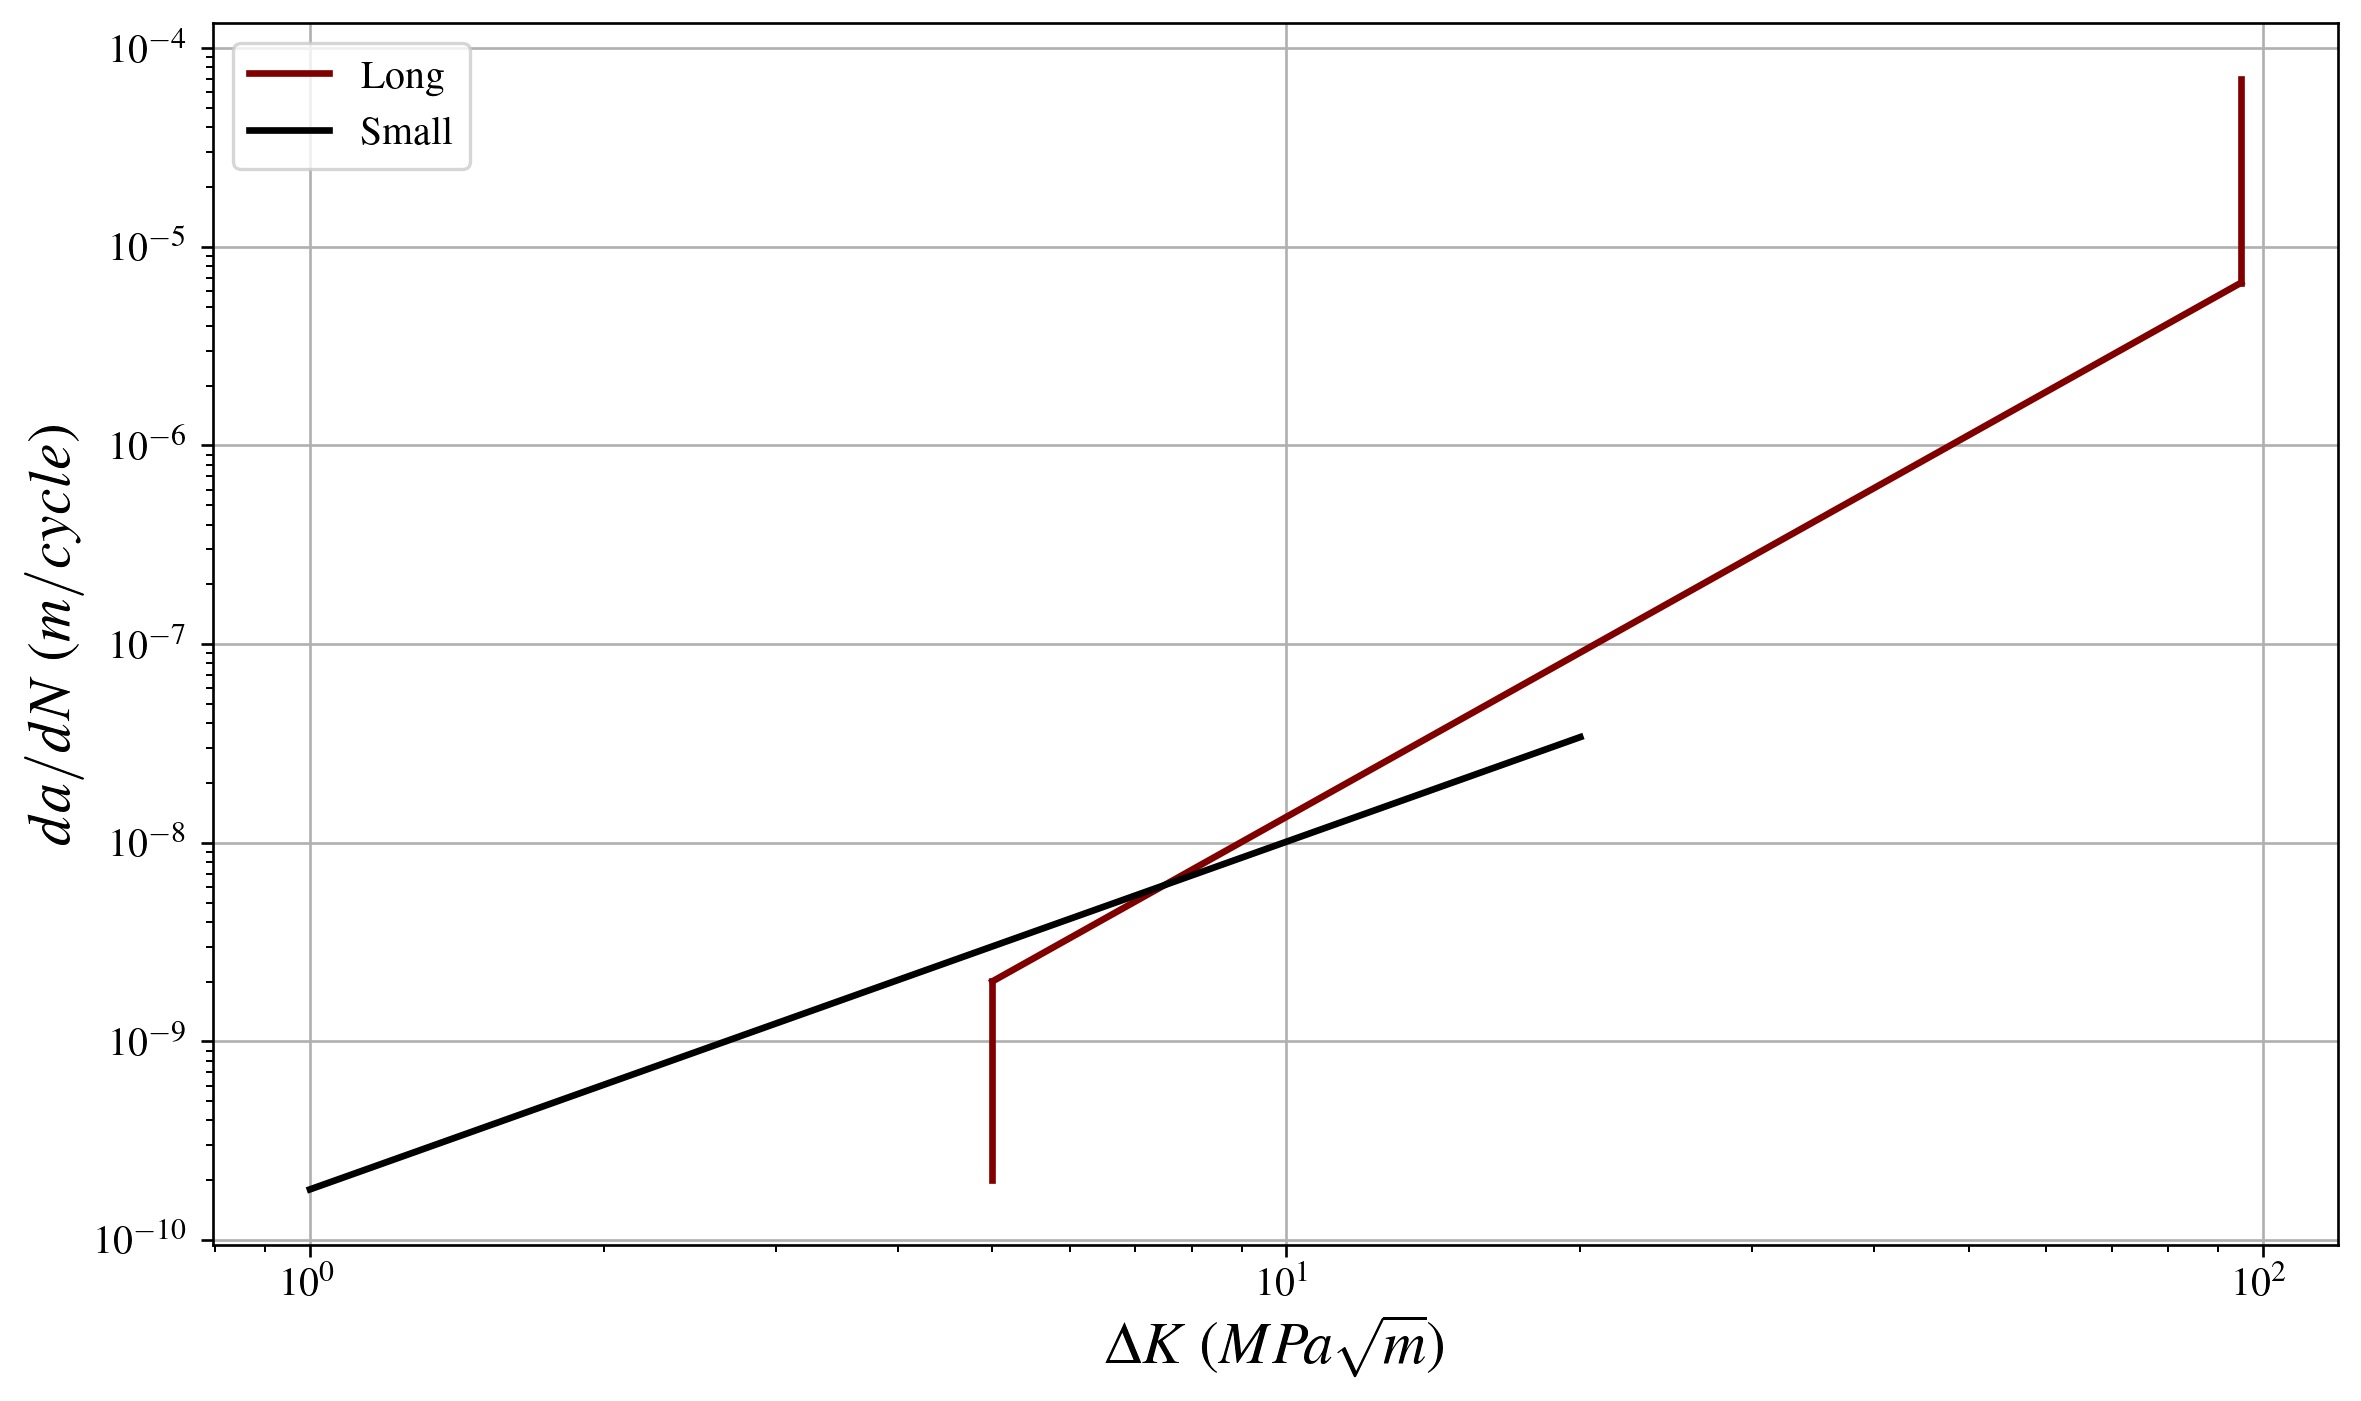

In [9]:
da_dN_long = lambda K_: 2.4e-11*K_**2.75
da_dN_small = lambda K_: 1.8e-10*K_**1.75
K_c, K_th = 95, 5

K_small = np.linspace(1, 20, 1000)
K_long = np.linspace(K_th, K_c, 1000)

fig, ax = plt.subplots()
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('$\Delta K$ ($MPa\sqrt{m}$)')
ax.set_ylabel('$da/dN$ ($m/cycle$)')

ax.plot(K_long, da_dN_long(K_long), label='Long')
ax.plot([K_th, K_th], [2e-10, da_dN_long(K_th)], color='maroon')
ax.plot([K_c, K_c], [da_dN_long(K_c), 7e-5], color='maroon')

ax.plot(K_small, da_dN_small(K_small), label='Small')
ax.legend()
plt.show()

Note: The graph does not include the curved portion at the asymptotes along $K_{th}$ and $K_c$.

### Part B
Extrapolation of the paris equation from the small crack equation into region 1 is **more conservative**, especially in comparison to the long crack equation. This conclusion is made by the observation that the small crack line extends to a higher $da/dN$ value in comparison to sigmoidal curve close to the $K_{th}$ asymptote, indicating that the crack grows at a faster rate with respect to the cycle number.

### Part C
The fatigue life relationship can be made by integrating:

$$\frac{d a}{d N}=A(\Delta K)^n=A(\Delta S \sqrt{\pi a} \alpha)^n=A(\Delta S)^n(\pi a)^{n / 2} \alpha^n$$

In [10]:
A, S, n, alpha, a = sp.symbols(r'A S n \alpha a', positive=True)
ai, af, Nf = sp.symbols('a_i a_f N_f')

with sp.evaluate(False):
    eq = sp.Eq(Nf, 1/(A*S**n*sp.pi**(n/2)*alpha**n)*sp.Integral(1/a**(n/2), (a, ai, af)))
eq

Eq(N_f, Integral(1/a**(n/2), (a, a_i, a_f))/((\alpha**n*(pi**(n/2)*(A*S**n)))))

In [11]:
eq2 = sp.Eq(Nf, eq.rhs.doit())
eq2

Eq(N_f, Piecewise((a_f**(1 - n/2)/(1 - n/2) - a_i**(1 - n/2)/(1 - n/2), Ne(n, 2)), (log(a_f) - log(a_i), True))/(pi**(n/2)*A*S**n*\alpha**n))

In [12]:
def substitute(n_, S_, A_, alpha_, ai_, af_):
    """
    Show a clear substitution of this complex relationship
    """
    with sp.evaluate(False):
        value = eq2.rhs.subs([
            (n, n_),
            (S, S_),
            (A, A_),
            (alpha, alpha_),
            (ai, ai_),
            (af, af_)
        ])
        display(sp.Eq(Nf, value))
    display(sp.Eq(Nf, value.n()))

For the long crack behavior,

In [13]:
substitute(sp.S('2.75'), 110, sp.S('2.4e-11'), sp.S('1.12'), sp.S('0.0003'), sp.S('0.001'))

Eq(N_f, Piecewise((0.001**(1 - 1/2*2.75)/(1 - 1/2*2.75) - 0.0003**(1 - 1/2*2.75)/(1 - 1/2*2.75), Ne(2.75, 2)), (log(0.001) - log(0.0003), True))/(1.12**2.75*110**2.75*2.4e-11*pi**((1/2)*2.75)))

Eq(N_f, 312152.699980792)

### Part D
For the small crack,

In [14]:
substitute(sp.S('1.75'), 110, sp.S('1.8e-10'), sp.S('1.12'), sp.S('0.0003'), sp.S('0.001'))

Eq(N_f, Piecewise((-0.0003**(1 - 1/2*1.75)/(1 - 1/2*1.75) + 0.001**(1 - 1/2*1.75)/(1 - 1/2*1.75), Ne(1.75, 2)), (log(0.001) - log(0.0003), True))/(1.12**1.75*1.8e-10*110**1.75*pi**((1/2)*1.75)))

Eq(N_f, 211105.305031732)

### Part E
The stress intensity factor for the initial and final crack can be determined by the following, 

$$K=1.12S\sqrt{\pi a}$$

In [15]:
Ki = 1.12*110*np.sqrt(np.pi*0.0003)
Kf = 1.12*110*np.sqrt(np.pi*0.001)
Ki, Kf  # MPa sqrt(m)

(3.7822155125702217, 6.90534917860225)

Therefore, it can be observed that the region of interest is region 1 from the plot in Part A. Specifically, the range from 3.78 to 6.90 falls in the extrapolated portion of the Paris equation, indicating that the above calculations are more conservative. That is, the actual fatigue life of the material is greater than what was calculated. Additionally, it can be deduced that the small crack equation has a higher crack growth rate in this region compared to the long crack equation, which is seen in the results because the small crack fatigue life was less.